# 프로젝트로 배우는 데이터 사이언스
## 4. 모델과 파라미터 찾기
## 4.1 최적의 모델과 파라미터 찾기

## 4.1.1 사이킷런을 통해 학습과 예측에 사용할 데이터셋 나누기
이전에 전처리한 데이터셋(diabetes_feature.csv) 활용

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


### 학습과 예측에 사용할 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [16]:
# Pregnancies 아닌 Pregnancies_high 값 사용, 불필요 feature 제거
X=df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age','Pregnancies_high',
       'Insulin_nan']]

In [17]:
y=df['Outcome']
y.shape

(768,)

In [18]:
# 테스트셋을 test_size 옵션으로 20% 지정
# 매번 샘플링마다 데이터 변화 방지 위해 random_state=42 로 같은 것을 사용
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
60,84,0,0,0.0,0.304,21,False,102.5
618,112,82,24,28.2,1.282,50,True,169.5
346,139,46,19,28.7,0.654,22,False,83.0
294,161,50,0,21.9,0.254,65,False,102.5
231,134,80,37,46.2,0.238,46,False,370.0
...,...,...,...,...,...,...,...,...
71,139,64,35,28.6,0.411,26,False,140.0
106,96,122,0,22.4,0.207,27,False,102.5
270,101,86,37,45.6,1.136,38,True,169.5
435,141,0,0,42.4,0.205,29,False,169.5


In [20]:
# 학습세트의 문제, 정답 확인
X_train.shape, y_train.shape

((614, 8), (614,))

In [21]:
# 예측세트의 문제, 정답 확인
X_test.shape, y_test.shape

((154, 8), (154,))

## 4.1.2 랜덤값을 고정하여 디시전트리로 학습과 예측하기

### 학습과 예측하기

In [22]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [23]:
# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [24]:
# 예측 -> 결과를 y_predict에 담기
# 0: 당뇨병 X, 1: 당뇨병O
y_predict=model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [28]:
# 다르게 예측한 갯수 -> diff_count
diff_count=abs(y_predict-y_test).sum()
diff_count

31

In [29]:
# accuracy score -> 지난 모델(전처리X 데이터)에서는 오버피팅이 발생한 것 예상
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)*100

79.87012987012987

## 4.1.3 최적의 max_depth 파라미터값 찾기
max_depth 파라미터 값 튜닝

In [30]:
feature_names=X_train.columns.tolist()

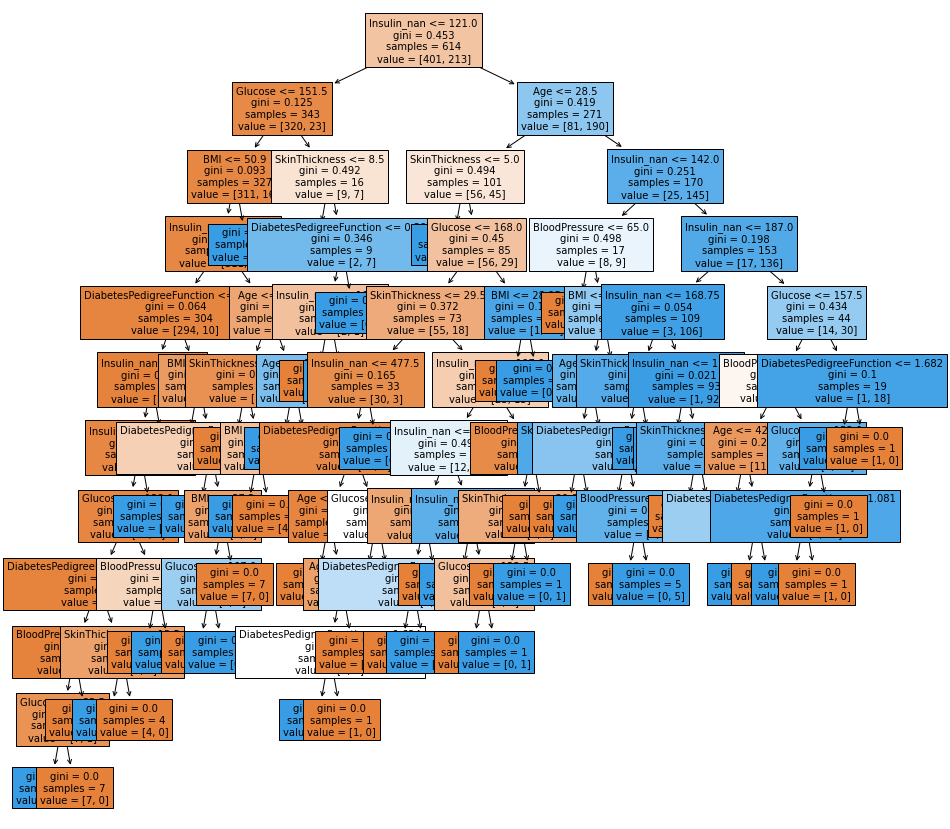

In [31]:
# plt.figure으로 사이즈를 지정, filled를 True로 설정하면 색상이 생김
# Insulin이 가장 상위 조건으로 나뉘고, gini 계수가 0이면 tree 그리기를 멈춤
# 샘플의 개수가 밑으로 갈수록 줄어듦
# max_depth: 트리의 깊이 (가지가 몇층까지 내려가는지)
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
tree=plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

In [32]:
# max_depth 값 조정 -> 성능 UP but, 너무 tree깊이 얕으면 언더피팅 발생
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=11, random_state=42)
model

DecisionTreeClassifier(max_depth=11, random_state=42)

### 최적의 max_depth 값 찾기

In [34]:
# for문 안에 모델을 넣어 max_depth 파라미터 바꿔가면서 모델 학습
# max_depth = 4 일때 성능 가장 높음(87.66) 
# 다른 파라미터 변경해도 성능 향상 가능
from sklearn.metrics import accuracy_score

for max_depth in range(3,12):
    model=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict=model.fit(X_train, y_train).predict(X_test)
    score=accuracy_score(y_test, y_predict)*100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.16883116883116
7 81.81818181818183
8 80.51948051948052
9 83.76623376623377
10 80.51948051948052
11 79.87012987012987


## 4.1.4 GridSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기

### Grid Search
![GridSearchCV?](data/GridSearchCV.png)
<br> cross validation 은 train 데이터셋을 여러 fold 로 나눠서 평균내는 방법

#### GridSearchCV 옵션
* param_grid: 튜닝하고 싶은 파라미터 정보를 넣기<br>
* max_features: 일부 feature만 사용하고 싶을 때, 1은 전체라는 뜻<br>
* n_jobs: -1로 설정하여 사용 가능한 모든 장비를 학습에 이용<br>
* cv: cross validation을 5개로 나눔(5가 기본)<br>
* verbose: 1로 하여 로그를 찍으면서 학습. 0이면 로그를 출력하지 않음(1~3 점점 자세히)<br>

In [36]:
from sklearn.model_selection import GridSearchCV

model=DecisionTreeClassifier(random_state=42)
param_grid={'max_depth':range(3,12),
           'max_features':[0.3, 0.5, 0.7, 0.9, 1]}
clf=GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [39]:
# 가장 성능 좋은 파라미터 찾기
clf.best_params_

{'max_depth': 4, 'max_features': 0.7}

In [42]:
# 가장 좋은 성능 내는 파라미터 조합 전체
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=0.7, random_state=42)

In [44]:
# 가장 좋은 점수
clf.best_score_

0.8779288284686124

In [46]:
# cv_results_: cross validation 결과를 데이터프레임으로 반환, 
# rank_test_score: score을 내림차순으로 확인
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.007200,0.000980,0.004201,0.000749,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.926829,0.853659,0.869919,0.926230,0.877929,0.043800,1
18,0.008401,0.000489,0.004401,0.000489,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,2
17,0.007200,0.000749,0.003801,0.000748,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.878049,0.918699,0.804878,0.869919,0.868852,0.868079,0.036497,3
22,0.007199,0.000980,0.003801,0.000400,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.878049,0.926829,0.788618,0.845528,0.893443,0.866493,0.046913,4
41,0.008200,0.000748,0.003801,0.000750,11,0.5,"{'max_depth': 11, 'max_features': 0.5}",0.821138,0.926829,0.804878,0.902439,0.860656,0.863188,0.046402,5


In [47]:
# 예측 -> 답안지 만들기
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [48]:
# test셋에서 더 좋은 스코어 나왔음
clf.score(X_test, y_test)

0.8831168831168831

## 4.1.5 RamdomSearchCV 를 사용해서 최적의 하이퍼 파라미터 값 찾기
* Grid Search: 우리가 설정한 범위 안에서만 parameter을 탐색<br>
* Random Search: 좋은 성능을 낼 수 있는 랜덤값을 탐색

 

In [49]:
# parameter 를 범위 안에 랜덤한 숫자로 정의
max_depth=np.random.randint(3,20,10) # 3부터 20 사이 10개 랜덤 pick
max_depth

max_features=np.random.uniform(0.7, 1.0, 100) # 0.7 부터 1.0 사이 100개 랜덤 pick

param_distributions={'max_depth':max_depth,
                    'max_features': max_features,
                    'min_samples_split':list(range(2,7))}
param_distributions

{'max_depth': array([18, 12, 12,  8,  6, 14,  7, 16,  5,  6]),
 'max_features': array([0.9714415 , 0.714381  , 0.81138665, 0.77477675, 0.92121843,
        0.71179337, 0.80205374, 0.80238747, 0.7890323 , 0.82702593,
        0.73698784, 0.74440243, 0.99241001, 0.7629385 , 0.78184384,
        0.92862632, 0.80639425, 0.97301525, 0.87937064, 0.8795752 ,
        0.96125746, 0.75488944, 0.7834282 , 0.85314531, 0.73005147,
        0.95679384, 0.88000912, 0.78178984, 0.84258455, 0.88589333,
        0.77344689, 0.73933659, 0.95609414, 0.71441664, 0.95669229,
        0.93048973, 0.83482956, 0.93383556, 0.88100365, 0.81126251,
        0.75112171, 0.81988725, 0.91505371, 0.81466649, 0.80784161,
        0.86549627, 0.82280223, 0.88367324, 0.81031745, 0.98124916,
        0.80192513, 0.72206912, 0.77591606, 0.76182054, 0.94656277,
        0.71539525, 0.93450718, 0.84959292, 0.92580505, 0.94535544,
        0.83794559, 0.72105948, 0.77866709, 0.71310574, 0.91414495,
        0.98135551, 0.82922185, 0.848

* n_iter: 샘플링한 하이퍼파라미터 조합의 횟수(훈련할 후보 모델의 개수)를 지정

In [51]:
# 가장 좋은 파라미터 찾기
from sklearn.model_selection import RandomizedSearchCV

clf=RandomizedSearchCV(model,
                      param_distributions,
                      n_iter=1000,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      random_state=42)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([18, 12, 12,  8,  6, 14,  7, 16,  5,  6]),
                                        'max_features': array([0.9714415 , 0.714381  , 0.81138665, 0.77477675, 0.92121843,
       0.71179337, 0.80205374, 0.80238747, 0.7890323 , 0.82702593,
       0.73698784, 0.74440243, 0.99241001, 0.7629385 , 0.78184384,
       0.928...
       0.91318509, 0.9297594 , 0.92136898, 0.79833183, 0.7322504 ,
       0.96875675, 0.92143477, 0.85858567, 0.82132594, 0.79873404,
       0.92655618, 0.73045075, 0.92681485, 0.82866708, 0.81563943,
       0.95522366, 0.96532317, 0.87768121, 0.77249543, 0.85630494,
       0.97901488, 0.72026991, 0.97349557, 0.94686532, 0.85982385,
       0.91879929, 0.80772945, 0.80941943, 0.90211863, 0.81949236]),
                                        'min_samples_split': [2, 3, 4, 5, 6]},
                   rand

In [52]:
# 가장 좋은 성능의 parameter 조합
clf.best_params_

{'min_samples_split': 2, 'max_features': 0.9345071752277465, 'max_depth': 6}

In [53]:
# 가장 좋은 점수
clf.best_score_

0.8713581234172997

In [54]:
# GridSearchCV(88) > RandomizedSearchCV(86)
clf.score(X_test, y_test)

0.8636363636363636

In [55]:
# 좋은 스코어 찾기 위해 범위 조정하는 과정 중요
# Grid Search보다 더 많은 값 랜덤하게 학습 가능
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
425,0.008200,0.000749,0.004202,0.000399,2,0.918799,6,"{'min_samples_split': 2, 'max_features': 0.918...",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,1
927,0.009820,0.002632,0.004799,0.001164,2,0.902119,6,"{'min_samples_split': 2, 'max_features': 0.902...",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,1
575,0.010802,0.004119,0.004400,0.000491,2,0.921435,6,"{'min_samples_split': 2, 'max_features': 0.921...",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,1
389,0.009000,0.000631,0.004601,0.001201,2,0.979015,6,"{'min_samples_split': 2, 'max_features': 0.979...",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,1
233,0.010599,0.003775,0.003401,0.000490,2,0.921218,6,"{'min_samples_split': 2, 'max_features': 0.921...",0.878049,0.886179,0.829268,0.878049,0.885246,0.871358,0.021324,1


## 4.2 다양한 트리계열 머신러닝 모델 사용하기
## 4.2.1 랜덤포레스트 사용하기
트리를 앙상블 기법(여러 기법을 섞어서 사용하는 기법)에 사용 가능<br>
Random Forest는 샘플링하여 여러 데이터를 만들며, 이 샘플은 배깅('부트스트랩')<br>
이를 통해 오버피팅을 방지



In [56]:
# 결정트리로 모델 만들기
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

In [57]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [59]:
# 예측
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [65]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당
(y_predict != y_test).sum()

31

In [60]:
# 정확도 계산
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7987012987012987

### 랜덤 포레스트

In [66]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [67]:
# 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# 예측
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [69]:
# diff_count : DecisionTree (31) -> RandomForest(21)로 감소
(y_predict != y_test).sum()

21

In [70]:
# 정확도 계산: DecisionTree (79) -> RandomForest(86)로 상승
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8636363636363636

In [72]:
# 랜덤 포레스트는 트리를 여러 개 만들기 때문에 시각화 어려움
# feature 별 중요도 계산
model.feature_importances_

array([0.17083288, 0.05779216, 0.07175888, 0.10433995, 0.07639253,
       0.11756395, 0.01413512, 0.38718453])

<AxesSubplot:>

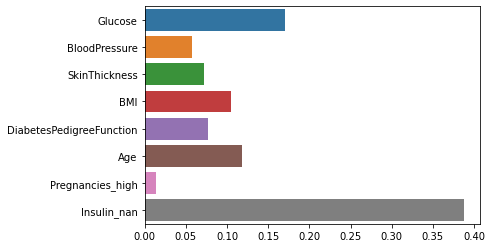

In [73]:
# 그래프 시각화
# 인슐린이 가장 중요 역할
# 대부분의 트리 알고리즘에서 feature_importances_ 알 수 있음
feature_names=X_train.columns.tolist()
sns.barplot(x=model.feature_importances_, y=feature_names)

In [75]:
# bagging
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model

RandomForestClassifier(random_state=42)

## 4.2.2 그라디언트 부스팅 알고리즘 사용하기
* single: 하나의 트리 사용
* bagging: 트리 여러 개 사용
* boosting: 트리에 가중치 부여<br>

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

In [79]:
# max_depth 지정X <-> 10 비교: 지정X 이 더 성능 좋음
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [80]:
# 학습
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
# 예측
y_predict=model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [82]:
# diff_count : DecisionTree (31) -> RandomForest(21) -> GradientBoosting(24)로 증가
(y_predict != y_test).sum()

24

In [83]:
# 정확도 계산: DecisionTree (79) -> RandomForest(86) -> radientBoosting(84)로 상승
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

In [84]:
# feature 별 중요도 계산
model.feature_importances_

array([1.06268466e-01, 6.83835703e-03, 6.70947014e-02, 3.66742496e-02,
       2.62879477e-02, 9.45686986e-02, 1.56708089e-04, 6.62110872e-01])

<AxesSubplot:>

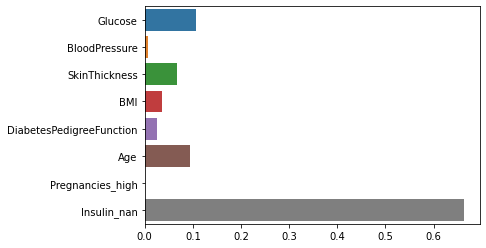

In [85]:
# 그래프 시각화
# 인슐린이 가장 중요 역할
# 대부분의 트리 알고리즘에서 feature_importances_ 알 수 있음
feature_names=X_train.columns.tolist()
sns.barplot(x=model.feature_importances_, y=feature_names)

## 4.2.3 RamdomSearchCV 로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기(1)

In [88]:
from sklearn.tree import DecisionTreeClassifier

estimator=DecisionTreeClassifier(random_state=42)
estimator

DecisionTreeClassifier(random_state=42)

In [89]:
# param_distributions: 랜덤 서치를 위한 변수들을 딕셔너리 형태로 넣기
# n_iter: 기본 10번을 반복 학습
# n_jobs: -1으로 지정하여 사용할 수 있는 자원을 모두 활용
# cv: 5로 하여 조각을 5개로 나눔
# verbose: 2로 지정하여 로그를 찍기

from sklearn.model_selection import RandomizedSearchCV

max_depth=np.random.randint(2,20,10)
max_features=np.random.uniform(0.3, 1.0, 10) # 30% ~ 100% 사이 10개

param_distributions={'max_depth':max_depth,
                    'max_features':max_features}

clf=RandomizedSearchCV(estimator,
                      param_distributions,
                      n_iter=100,
                      scoring='accuracy',
                      n_jobs=-1,
                      cv=5,
                      verbose=2)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([14,  3,  5, 10,  4,  7, 14,  6, 10, 10]),
                                        'max_features': array([0.9474195 , 0.84319422, 0.99647224, 0.3681136 , 0.41361108,
       0.32535828, 0.45612417, 0.50197289, 0.75951155, 0.68489598])},
                   scoring='accuracy', verbose=2)

In [91]:
clf.best_params_

{'max_features': 0.6848959816084904, 'max_depth': 4}

In [92]:
clf.best_score_

0.8779288284686124

In [93]:
# 3개의 알고리즘을 모두 선언하여 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators=[DecisionTreeClassifier(random_state=42),
           RandomForestClassifier(random_state=42),
           GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

## 4.2.4 RamdomSearchCV 로 여러 알고리즘의 최적의 하이퍼 파라미터를 찾기(2) 

In [94]:
# 3개의 모델을 for문으로 접근
# results 리스트에 계속 모델 이름 담기
results=[]
for estimator in estimators:
    result=[]
    result.append(estimator.__class__.__name__)
    results.append(result)
results

[['DecisionTreeClassifier'],
 ['RandomForestClassifier'],
 ['GradientBoostingClassifier']]

In [96]:
# clf 를 esimators 가 있는 for문 안으로 넣어 3개의 모델을 모두 번갈아 학습!
# DecisionTree는 n_estimators라는 트리의 개수를 뜻하는 파라미터 사용 가능
# n_estimators의 크기 클수록 모델 학습 시간 오래 걸림
# 각 모델 중 가장 좋은 스코어를 result에 기록

from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth, 
                       "max_features": max_features}

results=[]
for estimator in estimators:
    result=[]
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators']=np.random.randint(100,200,10)
        
    clf=RandomizedSearchCV(estimator,
                          param_distributions,
                          n_iter=10,
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=5,
                          verbose=2)
    
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [97]:
# 모델 별로 가장 성능 좋은 파라미터 수치 알 수 있음
df = pd.DataFrame(results, 
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.7992013962023833, 'max_dept...",0.853432,0.844156,"{'mean_fit_time': [0.01680164337158203, 0.0098..."
1,RandomForestClassifier,"{'n_estimators': 188, 'max_features': 0.797625...",0.905584,0.857143,"{'mean_fit_time': [0.4590752601623535, 0.73879..."
2,GradientBoostingClassifier,"{'n_estimators': 123, 'max_features': 0.797625...",0.897441,0.844156,"{'mean_fit_time': [1.2832883834838866, 0.26721..."


In [98]:
# 모델에 각각 접근하여 상위에 있는 모델 순서대로 보거나 정확한 parameter 설정 수치 확인 가능 
# 좋은 성능이 나오는 구간으로 계속 iteration을 돌릴 필요가 있음
# 하이퍼 파라미터 튜닝을 여러 번 할수록 좋은 성능을 얻을 수 있음

pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.702472,0.033720,0.041448,0.004352,188,0.797626,7,"{'n_estimators': 188, 'max_features': 0.797625...",0.878049,0.943089,0.869919,0.902439,0.934426,0.905584,0.029253,1
8,0.697499,0.061337,0.042404,0.005003,165,0.835659,15,"{'n_estimators': 165, 'max_features': 0.835659...",0.886179,0.943089,0.853659,0.902439,0.926230,0.902319,0.031184,2
1,0.738795,0.065721,0.040414,0.005294,188,0.835659,15,"{'n_estimators': 188, 'max_features': 0.835659...",0.878049,0.943089,0.853659,0.902439,0.926230,0.900693,0.032180,3
2,0.689997,0.034521,0.045002,0.006871,198,0.628251,7,"{'n_estimators': 198, 'max_features': 0.628251...",0.853659,0.934959,0.861789,0.902439,0.934426,0.897454,0.034608,4
9,0.430455,0.041882,0.027306,0.004398,111,0.464126,15,"{'n_estimators': 111, 'max_features': 0.464126...",0.869919,0.934959,0.853659,0.894309,0.934426,0.897454,0.033045,4
7,0.580069,0.019979,0.036799,0.001936,165,0.649578,15,"{'n_estimators': 165, 'max_features': 0.649578...",0.861789,0.934959,0.853659,0.910569,0.918033,0.895802,0.032182,6
5,0.530729,0.019958,0.044404,0.011271,146,0.835659,4,"{'n_estimators': 146, 'max_features': 0.835659...",0.853659,0.926829,0.853659,0.894309,0.918033,0.889298,0.030983,7
6,0.384627,0.014066,0.026802,0.003868,111,0.850592,3,"{'n_estimators': 111, 'max_features': 0.850592...",0.837398,0.926829,0.821138,0.878049,0.934426,0.879568,0.045690,8
0,0.459075,0.010437,0.099365,0.016620,135,0.797626,3,"{'n_estimators': 135, 'max_features': 0.797625...",0.837398,0.918699,0.821138,0.878049,0.934426,0.877942,0.044096,9
4,0.332468,0.016817,0.024780,0.001164,111,0.464126,2,"{'n_estimators': 111, 'max_features': 0.464126...",0.837398,0.894309,0.861789,0.837398,0.918033,0.869785,0.031909,10
